**1. Pembersihan Data**

In [4]:
#Cek missing Vallue

import pandas as pd
data = pd.read_csv('dataset.csv')
print(data.isnull().sum())

State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64


In [ ]:
#Format kolom tanggal

data['Arrival_Date'] = pd.to_datetime(data['Arrival_Date'], format='%d-%m-%Y')

**2. Deskripsi Statistik**

In [6]:
#Mean, median, standard deviasi
print(data[['Min Price', 'Max Price', 'Modal Price']].describe())

           Min Price      Max Price    Modal Price
count   23093.000000   23093.000000   23093.000000
mean     4187.077045    4976.034260    4602.917742
std      5472.783385    6277.308057    5843.822711
min         0.000000       0.000000       0.830000
25%      1750.000000    2000.000000    1955.000000
50%      2725.000000    3400.000000    3000.000000
75%      5000.000000    6000.000000    5500.000000
max    223500.000000  227500.000000  225500.000000


In [7]:
#distribusi jumlah data per komoditas
print(data['Commodity'].value_counts())

Potato                      1205
Onion                       1134
Brinjal                     1033
Green Chilli                 931
Bhindi(Ladies Finger)        860
                            ... 
Alasande Gram                  1
Almond(Badam)                  1
Cinamon(Dalchini)              1
Broomstick(Flower Broom)       1
She Buffalo                    1
Name: Commodity, Length: 234, dtype: int64


**3. Visualisasi Data**

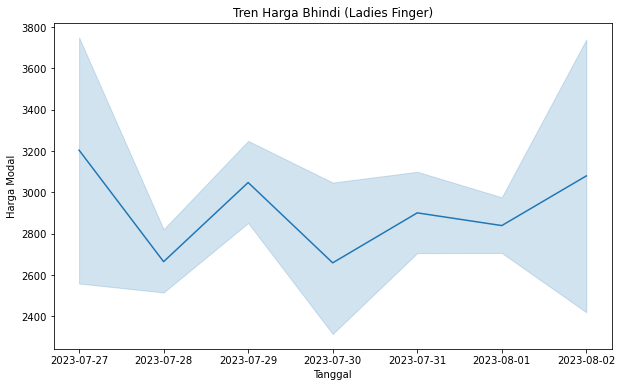

In [ ]:
#Visualisasi Tren Harga Komoditas
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk komoditas tertentu
filtered_data = data[data['Commodity'] == 'Bhindi(Ladies Finger)']

# Plot tren harga
plt.figure(figsize=(10, 6))
sns.lineplot(x='Arrival_Date', y='Modal Price', data=filtered_data)
plt.title('Tren Harga Bhindi (Ladies Finger)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Modal')
plt.show()

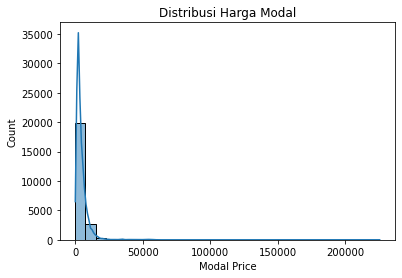

In [ ]:
#Distribusi Harga Modal
sns.histplot(data['Modal Price'], kde=True, bins=30)
plt.title('Distribusi Harga Modal')
plt.show()

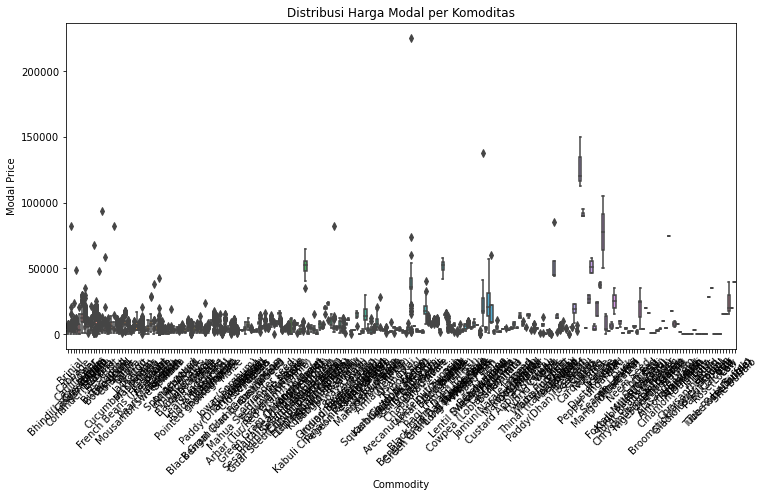

In [ ]:
#Boxplot Per Komoditas
plt.figure(figsize=(12, 6))
sns.boxplot(x='Commodity', y='Modal Price', data=data)
plt.title('Distribusi Harga Modal per Komoditas')
plt.xticks(rotation=45)
plt.show()

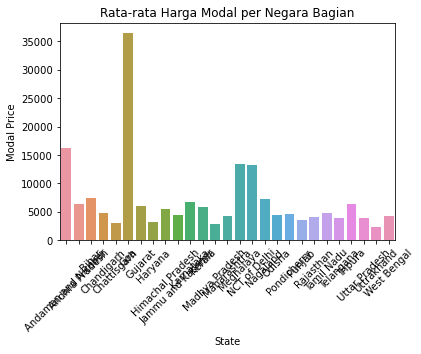

In [ ]:
#Analisis Per Negara Bagian
state_avg = data.groupby('State')['Modal Price'].mean().reset_index()

sns.barplot(x='State', y='Modal Price', data=state_avg)
plt.title('Rata-rata Harga Modal per Negara Bagian')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Visualisasi interaktif
import plotly.express as px

fig = px.line(filtered_data, x='Arrival_Date', y='Modal Price', title='Tren Harga Bhindi (Ladies Finger)')
fig.show()